In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import random
N=100
xDim=100
yDim=100
#X=list()
#Y=list()
#directions=list()

def setupAllAgents(number,width,height):
    X=list()
    Y=list()
    directions=list()
    for i in range(number):
        X.append(random.randint(1,width-2))
        Y.append(random.randint(1,height-2))
        directions.append(random.randint(0,7))
    return X,Y,directions

X,Y,directions=setupAllAgents(N,xDim,yDim)

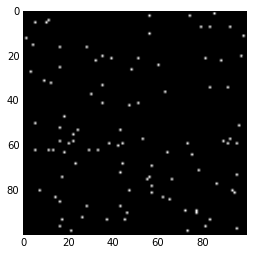

In [9]:
from pandas import *

area=list()
for i in range(yDim):
    area.append(list())
    for j in range(xDim):
        area[i].append(0)
        
for i in range(N):
    area[X[i]][Y[i]]=1

imshow(area,"gray")

In [50]:
class Agent:
    def __init__(self,width,height):
        self.X=random.randint(1,width-2)
        self.Y=random.randint(1,height-2)
        self.direction=random.randint(0,7)
        self.trackX=list()
        self.trackY=list()
    
    def moveAround(self,area):
        xm=[0,1,1,1,0,-1,-1,-1]
        ym=[-1,-1,0,1,1,1,0,-1]
        nlX=self.X+xm[self.direction]
        nlY=self.Y+ym[self.direction]
        if area[nlX][nlY]==0:
            self.X=nlX
            self.Y=nlY
        else:
            self.direction=random.randint(0,7)
        self.trackX.append(self.X)
        self.trackY.append(self.Y)
            
    def __str__(self):
        return "I am at X:{0} Y:{1} Dir:{2}".format(self.X,self.Y,self.direction)
        
    

myAgent=Agent(xDim,yDim)
#myAgent.setup(xDim,yDim)
#myAgent.show()
#print myAgent

[0, 100, 0, 100]

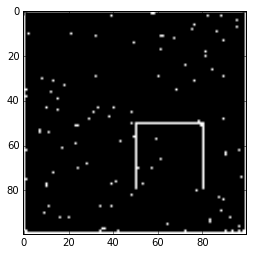

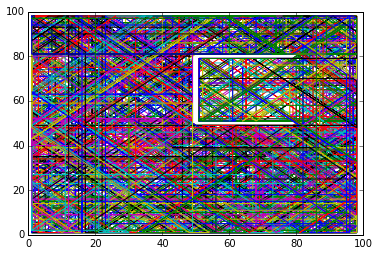

In [56]:
area=list()
for i in range(yDim):
    area.append(list())
    for j in range(xDim):
        area[i].append(0)
        
agents=list()
for i in range(N):
    agents.append(Agent(xDim,yDim))

#add walls
for x in range(xDim):
    area[x][0]=1
    area[x][yDim-1]=1
    
for y in range(yDim):
    area[0][y]=1
    area[xDim-1][y]=1
    
#add niche
for z in range(30):
    area[50+z][50]=1
    area[50][50+z]=1
    area[50+z][80]=1
    
for i in range(N):
    area[agents[i].X][agents[i].Y]=1

for t in range(1000):
    
    for i in range(N):
        area[agents[i].X][agents[i].Y]=0
        agents[i].moveAround(area)
        area[agents[i].X][agents[i].Y]=1
figure()    
imshow(area,"gray")
figure()

for i in range(100):
    plot(agents[i].trackX,agents[i].trackY)
axis([0,xDim,0,yDim])

In [18]:
myOtherAgent=Agent()
myOtherAgent.setup(xDim,yDim)
print myOtherAgent.direction

4


In [22]:
agents=list()
for i in range(N):
    localAgent=Agent()
    localAgent.setup(xDim,yDim)
    agents.append(localAgent)

In [23]:
print agents[0]

<__main__.Agent instance at 0x105c32c68>


In [14]:
class Parent:
    def move(self):
        print "parent moves"
        
class ChildA (Parent):
    def move(self):
        print "I overloaded this function, now child A moves"
        
class ChildB (Parent):
    def move(self):
        print "I am type B"

class ChildC(Parent):
    def other(self):
        return 0
    
myObject=Parent()
myObject.move()

parent moves


In [9]:
myChild=ChildA()
myChild.move()

I overloaded this function, now child A moves


In [15]:
import random
L=list()
for i in range(10):
    j=random.randint(0,3)
    if j==0:
        L.append(Parent())
    if j==1:
        L.append(ChildA())
    if j==2:
        L.append(ChildB())
    if j==3:
        L.append(ChildC())
       
for dude in L:
    dude.move()

parent moves
I overloaded this function, now child A moves
parent moves
parent moves
I am type B
I overloaded this function, now child A moves
parent moves
parent moves
parent moves
I overloaded this function, now child A moves
